# Лабораторная работа №2
В данной работе необходимо реализовать алгоритм градиентного спуска для решения задачи классификации с помощью логистической регрессии. Нельзя пользоваться готовыми библиотеками. Файлы с данными пронумерованы по вариантам. Необходимо обработать только свой вариант. Номер варианта совпадает с номером в списке группы (столбец "вариант" в таблице с результатами).

1. Условие сдачи работы: точности классификации должна превысить значение в столбце "Порог2" (по номеру варианта).
2. При обучении необходимо воспользоваться отложенной выборкой для оценки обобщающей способности модели на новых данных.
3. Для успешного выполнения задания необходимо выполнить отбор значимых признаков.

Вариант № 20
Порог: 0.65

В логистической регрессии используется сигмоидальная функция активации, поэтому алгоритм описывается следующим образом:

$$a(\bar x^{(i)}, \bar \theta) = \frac{1}{1 + e^{- \bar\theta^T \bar x}}$$

Пороговая функция:

$$\begin{equation*}
\hat y = 
 \begin{cases}
   0 \text{, если $a(\bar x^{(i)}, \bar \theta) \lt 0.5$}\\
   1 \text{, иначе}
 \end{cases}
\end{equation*}$$

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

# Logistic Regression
class LogitRegression():
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations

    # Function for model training
    def fit(self, X, Y):
        # no_of_training_examples, no_of_features
        self.m, self.n = X.shape
        # weight initialization
        self.W = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y
        self.cost = []
        
        # gradient descent learning
        for i in range(self.iterations):
            self.update_weights()
        return self
    
    # Helper function to update weights in gradient descent
    def update_weights(self):
        A = 1 / (1 + np.exp(-(self.X.dot(self.W) + self.b)))
        
        # calculate gradients
        tmp = (A - self.Y.T)
        tmp = np.reshape(tmp, self.m)
        dW = np.dot(self.X.T, tmp) / self.m
        db = np.sum(tmp) / self.m
        
        # update weights
        self.W = self.W - self.learning_rate * dW
        self.b = self.b - self.learning_rate * db
        
        # calculate log likelihood
        
        self.cost.append(self.log_likelihood(self.Y.ravel(), A.ravel()))
        return self
    
    # Hypothetical function h(x)
    def predict(self, X):    
        Z = 1 / (1 + np.exp(-(X.dot(self.W) + self.b)))
        Y = np.where(Z > 0.5, 1, 0)
        return Y
    
    def log_likelihood(self, y_real, y_pred):
        return -y_real.dot(np.log(y_pred)) - ((1 - y_real).dot(np.log(1 - y_pred)))

In [2]:
# Importing dataset
df_X = pd.read_csv('data/train_features_0020.csv', header=None, index_col=False)
df_y = pd.read_csv('data/train_labels_0020.csv', header=None, index_col=False)
X = df_X.values
Y = df_y.values

In [3]:
X.shape

(700, 8)

In [4]:
corr_matrix = np.corrcoef(X, rowvar=False)

In [5]:
corr_matrix.shape

(8, 8)

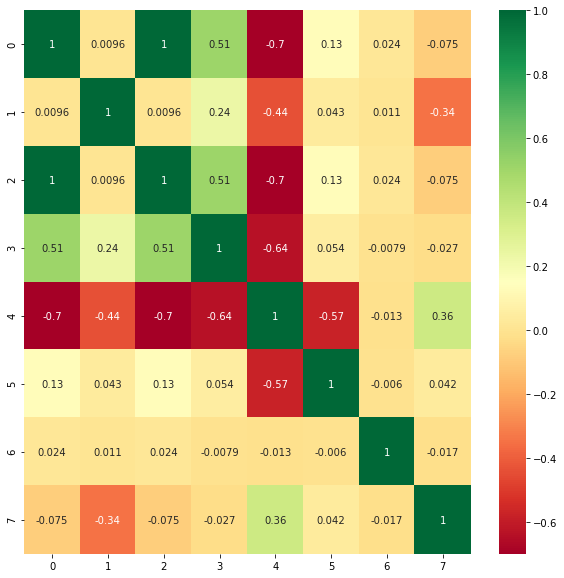

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(corr_matrix, annot=True, cmap="RdYlGn")

In [7]:
del_col = [2, 4]
X = np.delete(X, del_col, axis=1)

In [8]:
X.shape

(700, 6)

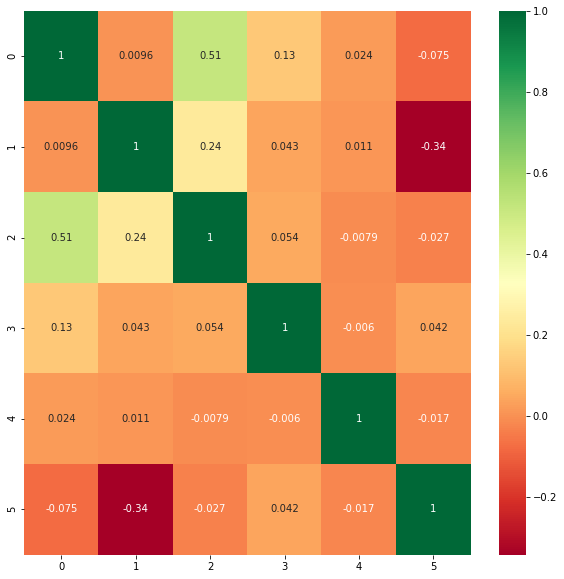

In [9]:
corr_matrix = np.corrcoef(X, rowvar=False)
plt.figure(figsize=(10,10))
g=sns.heatmap(corr_matrix, annot=True, cmap="RdYlGn")

In [10]:
# Splitting dataset into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [11]:
# Model training    
model = LogitRegression(learning_rate = 0.01, iterations = 10000)
      
model.fit(X_train, Y_train)
model1 = LogisticRegression()
model1.fit( X_train, Y_train.ravel())

LogisticRegression()

In [12]:
# Prediction on test set
Y_pred = model.predict(X_test)
Y_pred1 = model1.predict(X_test)

# measure performance   
err = (Y_test.ravel() != Y_pred.ravel()).sum()
err1 = (Y_test.ravel() != Y_pred1.ravel()).sum()

print("Accuracy on test set by our model: ", 1 - (err / Y_pred.size))
print("Accuracy on test set by sklearn model: ", 1 - (err / Y_pred.size))

Accuracy on test set by our model:  0.7571428571428571
Accuracy on test set by sklearn model:  0.7571428571428571


In [13]:
df_X_test = pd.read_csv('data/test_features_0020.csv', header=None, index_col=False)
X_test_test = df_X_test.values
X_test_test = np.delete(X_test_test, del_col, axis=1)
# Prediction on test set
Y_pred_test = model.predict(X_test_test)
Y_pred_test1 = model1.predict(X_test_test)

In [14]:
corr = np.corrcoef(Y_pred_test, Y_pred_test1)

In [15]:
corr

array([[1., 1.],
       [1., 1.]])

In [16]:
pd.DataFrame(Y_pred_test).to_csv('lab2.csv', header=False, index=False)

In [79]:
Y_pred_test.shape

(300,)